# 概要
- LangChainとGPT3を会話エンジンとして活用
- アプリケーションのフロントエンドはgradioを活用


実行結果は↓みたいな感じになる。

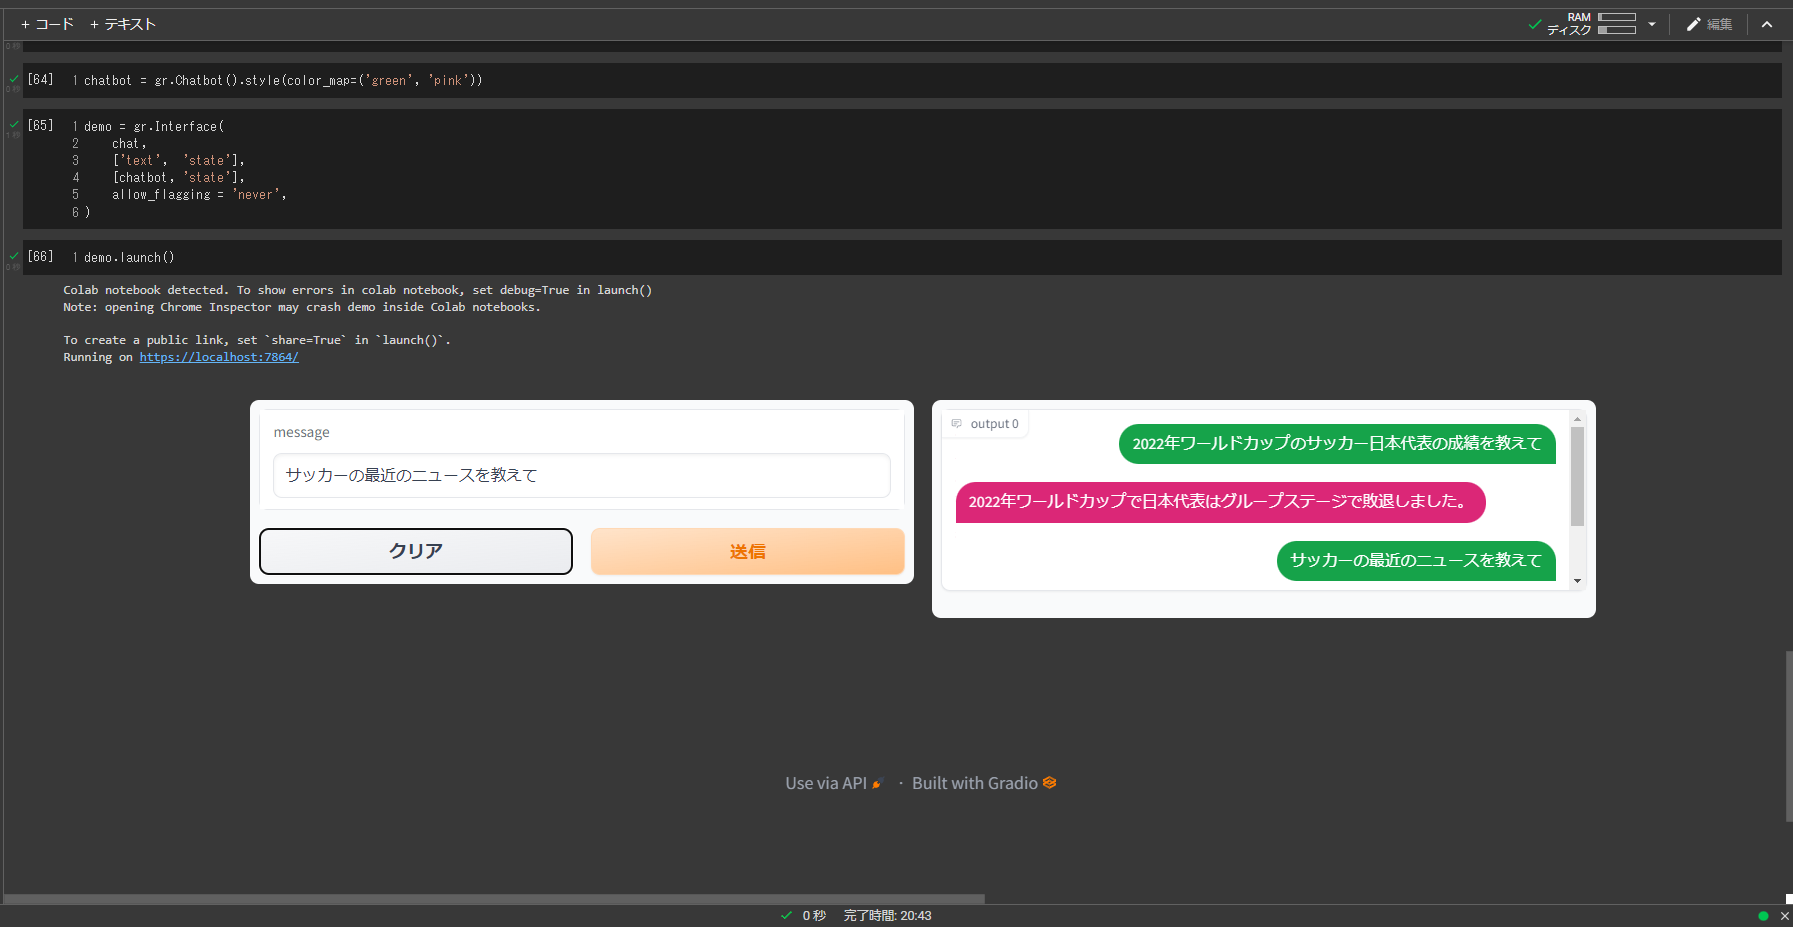

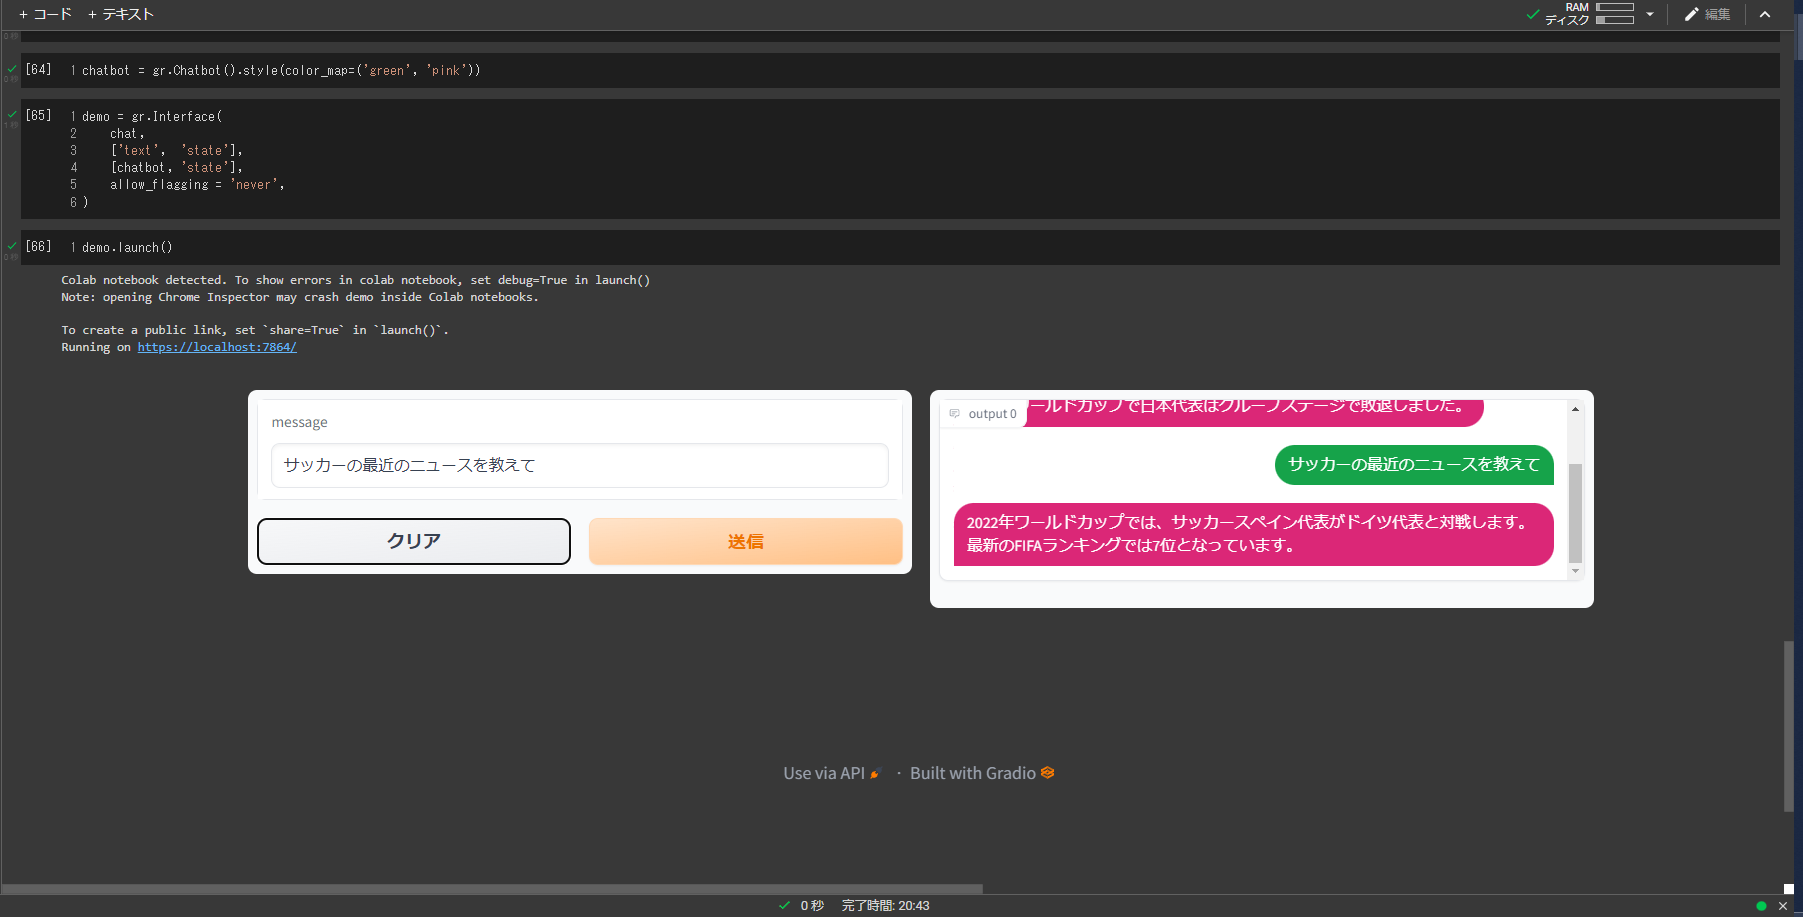

In [ ]:
# パッケージのインストール
!pip install langchain
!pip install openai
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
GPT_API_KEY     = "OPENAIのAPIキー"
GOOGLE_API_KEY  = "Googleカスタム検索のAPIキー" # Googleカスタム検索のAPIキー
GOOGLE_CSE_ID   = "Googleカスタム検索の検索エンジンID" # Googleカスタム検索の検索エンジンID

In [ ]:
import os

os.environ["OPENAI_API_KEY"]  = GPT_API_KEY
os.environ["GOOGLE_CSE_ID"]   = GOOGLE_CSE_ID 
os.environ["GOOGLE_API_KEY"]  = GOOGLE_API_KEY

In [ ]:
# パッケージのインポート

# gradioのインポート
import gradio as gr

# langchain関連のパッケージインポート

# エージェント系のライブラリインポート
from langchain.agents import load_tools
from langchain.agents import initialize_agent

# OpenAI
from langchain.llms import OpenAI

# 会話用のメモリ
from langchain import ConversationChain
from langchain.chains.conversation.memory import ConversationBufferMemory # 要約しながら会話をするとき
from langchain.chains.conversation.memory import ConversationalBufferWindowMemory # ある時点までの過去の会話を記憶しながら会話をするとき


# ChatGPTっぽく使うためにはプロンプトが必要なので
from langchain.agents  import ZeroShotAgent


from langchain.agents  import AgentExecutor


from langchain.chains  import LLMChain

In [ ]:
llm = OpenAI(temperature=0)

In [ ]:
# 利用するツールの定義
# ※llm-mathは必須だから加えておく

tools = load_tools(["google-search", "llm-math"],
                   llm = llm)

In [ ]:
# プロンプトの生成&定義
prefix = """ Have a conversation with a human, answering the following questions as best you can. You have access to the following tools: """

suffix = """Begin!"
            {chat_history}
            Question: {input}
            {agent_scratchpad}
         """

prompt = ZeroShotAgent.create_prompt(tools,
                                     prefix = prefix,
                                     suffix = suffix,
                                     input_variables = ["input", "chat_history", "agent_scratchpad"])

In [ ]:
# LLM Chainの定義
llm_chain = LLMChain(llm    = llm,
                     prompt = prompt)

In [ ]:
# エージェントのインスタンス化

agent = ZeroShotAgent(llm_chain = llm_chain,
                      tools     = tools,
                      verbose   = True)

In [ ]:
# メモリの定義

memory = ConversationBufferMemory(memory_key="chat_history")

In [ ]:
# 定義したエージェントやツール、メモリを使って、エージェントのチェーンを生成

agent_chain = AgentExecutor.from_agent_and_tools(agent   = agent,
                                                 tools   = tools,
                                                 verbose = True,
                                                 memory  = memory
                                                 )

In [ ]:
def chat(message, history):
  history  = history or []
  response = agent_chain.run(input = message)
  
  history.append((message, response))
  
  return history, history

In [ ]:
chatbot = gr.Chatbot().style(color_map=('green', 'pink'))

In [ ]:
demo = gr.Interface(
    chat,
    ['text',  'state'],
    [chatbot, 'state'],
    allow_flagging = 'never',
)

In [ ]:
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>